In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import MDS
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.io import output_notebook
from bokeh.models import PrintfTickFormatter
sns.set(style="darkgrid")

## Load data from SplitStrains

In [2]:
f = '/home/user1/Documents/lab/DrugResistance/splitStrains/data/mixed_data/output/2_10/freqVec.filter.csv'
f2 = '/home/user1/Documents/lab/DrugResistance/splitStrains/data/mixed_data/output/24_10/freqVec.filter.csv'
# f = '/home/user1/Documents/lab/DrugResistance/splitStrains/data/mixed_data/output/5_10/freqVec.filter.csv'

freqVec = np.loadtxt(open(f, "r"), delimiter=",")


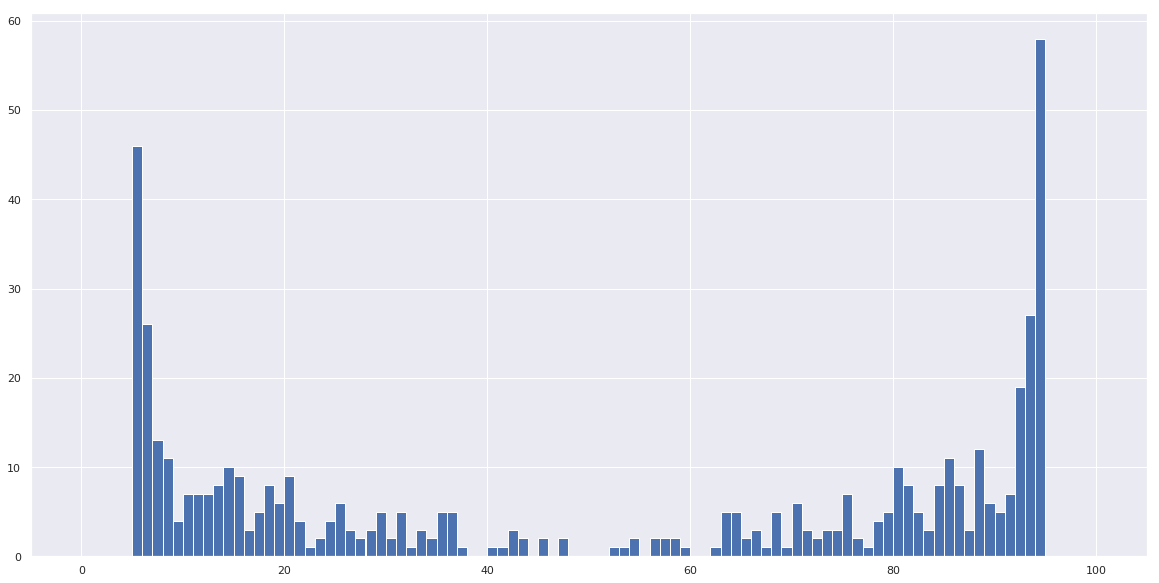

In [3]:
freqVecFlat = freqVec.flatten()
freqVecFlat = freqVecFlat[freqVecFlat > 5]
freqVecFlat = freqVecFlat[freqVecFlat < 95]
plt.figure(figsize = (20,10))
plt.hist(freqVecFlat, bins=100, range=(0,100), label='Proportion (lin scale)')
plt.show()

## Filter data

In [4]:
freqVecFilt = []
for a in freqVec:
    if a[0:4].max() < 95:
        freqVecFilt.append(a)

## PCA

In [5]:
freqVec = np.array(freqVecFilt)
print(freqVec)
n = len(freqVec)
x = StandardScaler().fit_transform(freqVec[0:n])
pca = PCA(n_components=2, whiten=True)
pcaData = pca.fit_transform(x)

[[0.000000e+00 8.548387e+01 1.451613e+01 0.000000e+00 1.048550e+05]
 [1.500000e+01 0.000000e+00 0.000000e+00 8.500000e+01 1.048570e+05]
 [0.000000e+00 7.968750e+01 0.000000e+00 2.031250e+01 1.050060e+05]
 ...
 [0.000000e+00 1.153846e+01 8.846154e+01 0.000000e+00 2.867458e+06]
 [0.000000e+00 8.846154e+01 0.000000e+00 1.153846e+01 2.867460e+06]
 [0.000000e+00 9.428571e+01 5.714290e+00 0.000000e+00 2.894224e+06]]


## Plot PCA

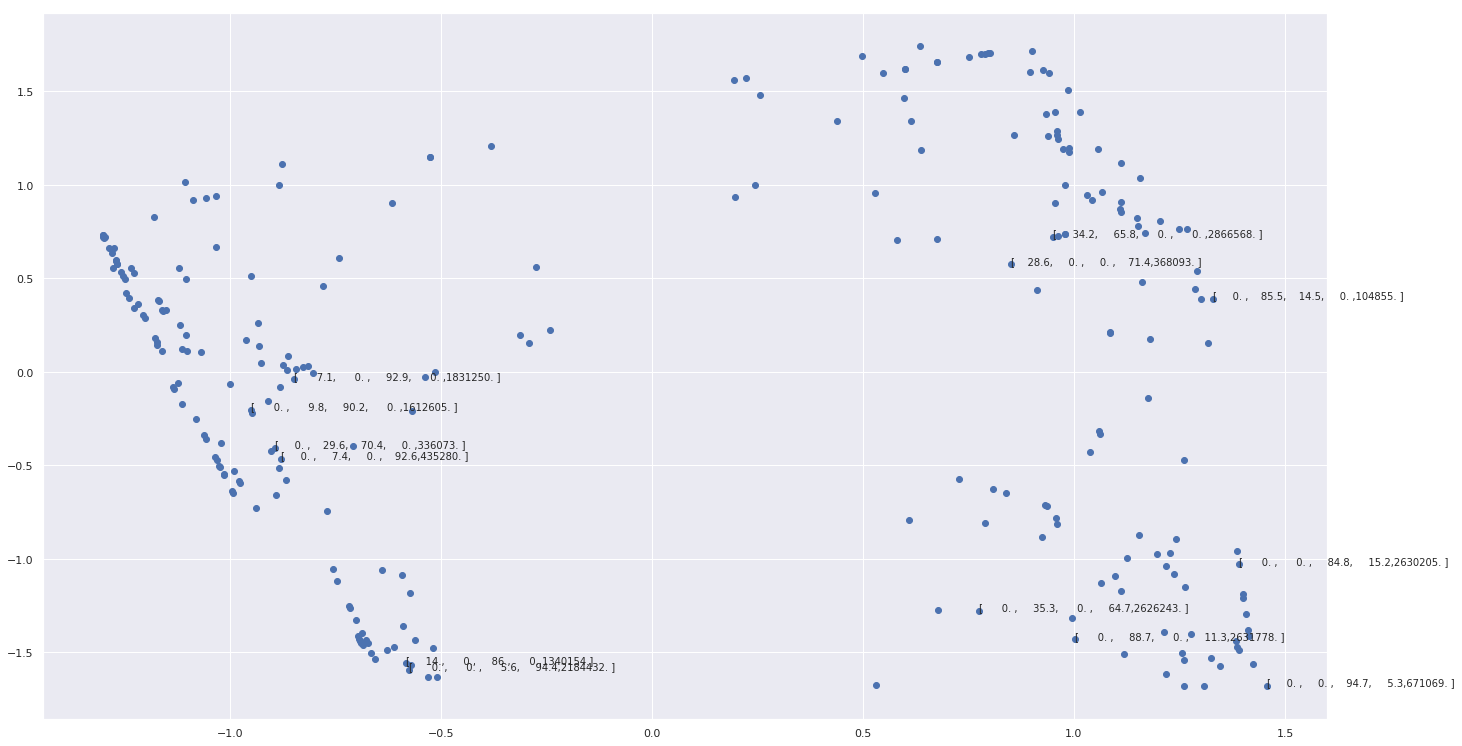

In [6]:
plt.figure(figsize = (23,13))
plt.scatter(pcaData[:,0], pcaData[:,1])

for i, txt in enumerate(freqVec[0:n][::20]):
    txt = np.array2string(txt, precision=1, separator=',', suppress_small=True)
    plt.annotate(txt,(pcaData[i,0],pcaData[i,1]))
plt.show()

## Take out position axis and do PCA again

In [7]:
freqVecNoPos = freqVec[:,0:-1]
print(freqVecNoPos)
n = len(freqVecNoPos)
x = StandardScaler().fit_transform(freqVecNoPos[0:n])
pca = PCA(n_components=2, whiten=True)
pcaData = pca.fit_transform(x)

[[ 0.      85.48387 14.51613  0.     ]
 [15.       0.       0.      85.     ]
 [ 0.      79.6875   0.      20.3125 ]
 ...
 [ 0.      11.53846 88.46154  0.     ]
 [ 0.      88.46154  0.      11.53846]
 [ 0.      94.28571  5.71429  0.     ]]


## Plot PCA with no position index

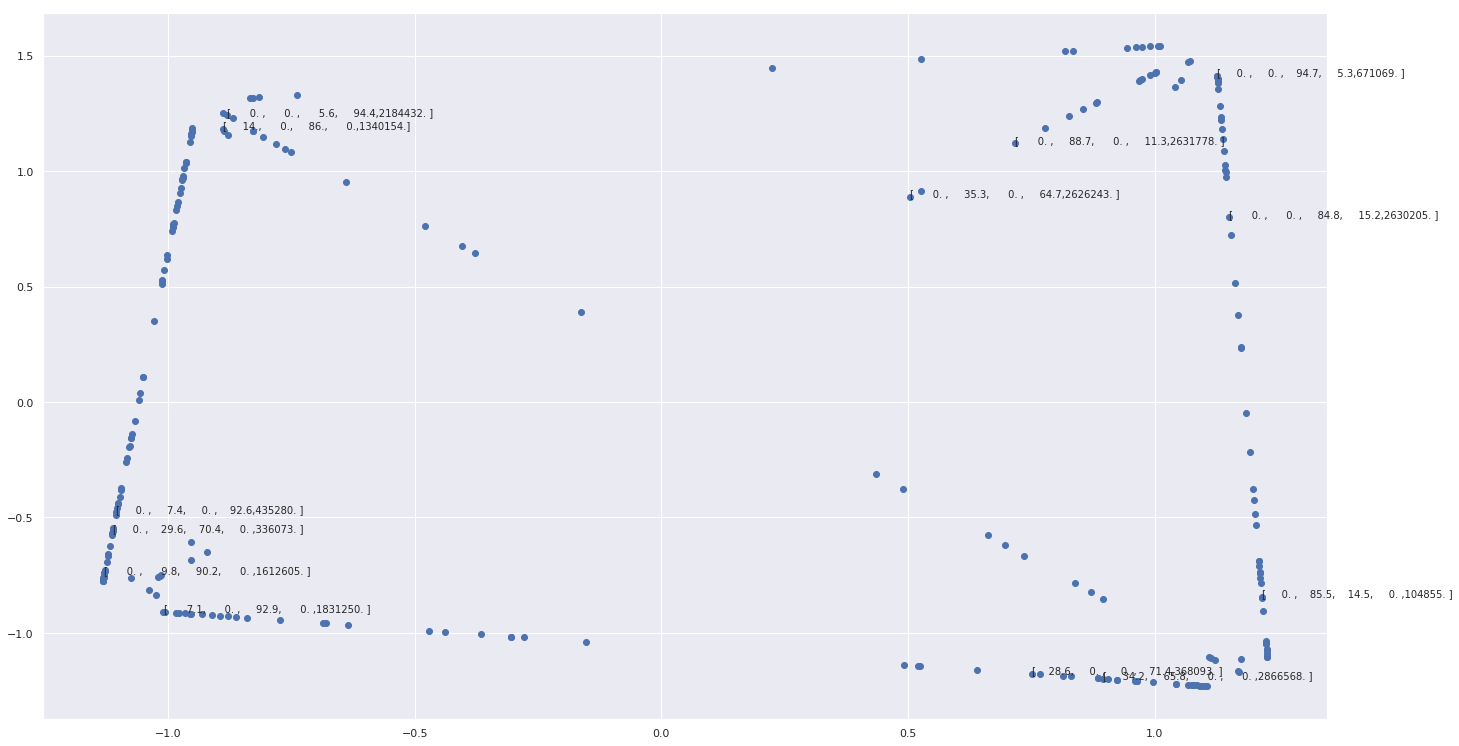

In [8]:
plt.figure(figsize = (23,13))
plt.scatter(pcaData[:,0], pcaData[:,1])
for i, txt in enumerate(freqVec[0:n][::20]):
    txt = np.array2string(txt, precision=1, separator=',', suppress_small=True)
    plt.annotate(txt,(pcaData[i,0],pcaData[i,1]))
plt.show()

## MDS

In [9]:
embedding = MDS(n_components=2)
mdsData = embedding.fit_transform(freqVecNoPos)

## Plot MDS

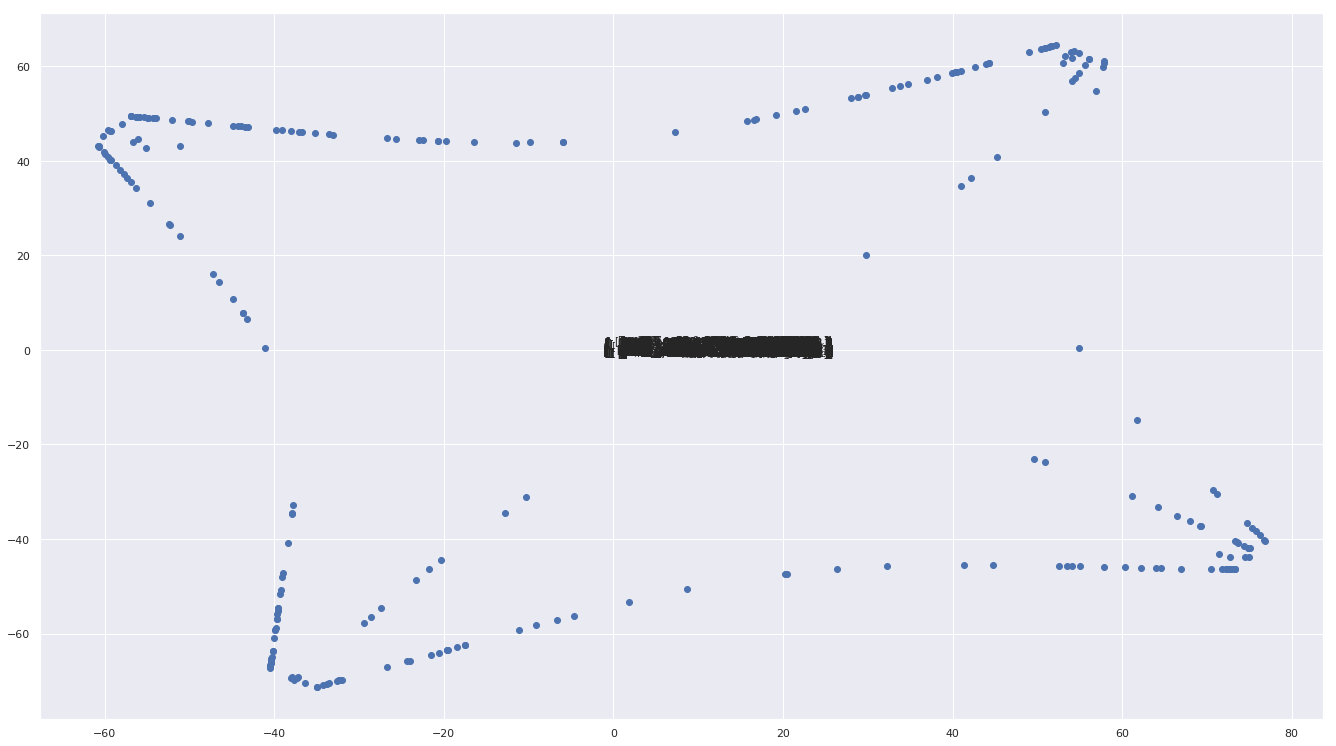

In [10]:
plt.figure(figsize = (23,13))
plt.scatter(mdsData[:,0], mdsData[:,1])
for i, txt in enumerate(freqVec[0:n][::1]):
    txt = np.array2string(txt, precision=1, separator=',', suppress_small=True)
    plt.annotate(txt,(pcaData[i,0],pcaData[i,1]))
plt.show()

## Create 2d point cloud representing proportions
## Each point has the following entries (position, proportion)

In [11]:
dataPoints = []
for a in freqVec:
    for v in a[0:-1]:
        dataPoints.append([a[4],v])
dataPoints = np.array(dataPoints, dtype=int)

# process additional sample for comparison
freqVec2 = np.loadtxt(open(f2, "r"), delimiter=",")

print(dataPoints)

[[ 104855       0]
 [ 104855      85]
 [ 104855      14]
 ...
 [2894224      94]
 [2894224       5]
 [2894224       0]]


## Load second sample

In [20]:
freqVec2 = np.loadtxt(open(f2, "r"), delimiter=",")

freqVecFilt2 = []
for a in freqVec2:
    if a[0:4].max() < 95:
        freqVecFilt2.append(a)
freqVec2 = np.array(freqVecFilt2)

dataPoints2 = []
for a in freqVec2:
    for v in a[0:-1]:
        dataPoints2.append([a[4],v])
dataPoints2 = np.array(dataPoints2, dtype=int)

In [27]:
output_notebook()
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)
p.xaxis[0].formatter = PrintfTickFormatter(format="%u")
p.height = 800
p.width = 800
p.scatter(dataPoints2[:,0], dataPoints2[:,1], marker='circle',fill_alpha=1,line_color=None, fill_color="red")
p.scatter(dataPoints[:,0], dataPoints[:,1], fill_alpha=1,line_color=None, fill_color="blue")
show(p)  # open a browser

Loading BokehJS ...

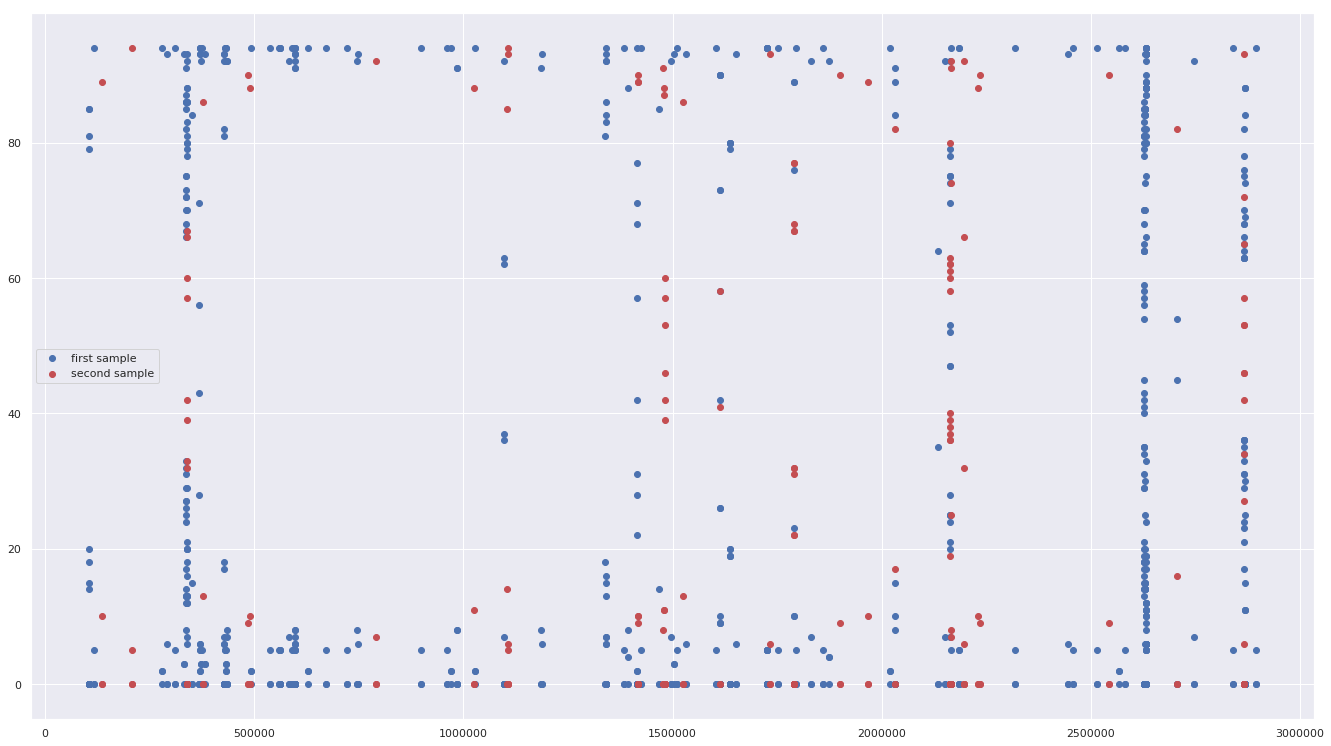

In [32]:
plt.figure(figsize = (23,13))
plt.scatter(dataPoints[:,0], dataPoints[:,1])
plt.scatter(dataPoints2[:,0], dataPoints2[:,1], color='r')
plt.legend(['first sample', 'second sample'])
plt.show()